# Explore here

In [33]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
# Load data
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'
df = pd.read_csv(url)


In [3]:
df.head()


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [5]:
df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [6]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()


fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [7]:
df.isna().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [12]:
df.dropna(inplace=True)


In [9]:
columns = df.columns.tolist()
for col in columns:
    print(col)


fips
TOT_POP
0-9
0-9 y/o % of total pop
19-Oct
10-19 y/o % of total pop
20-29
20-29 y/o % of total pop
30-39
30-39 y/o % of total pop
40-49
40-49 y/o % of total pop
50-59
50-59 y/o % of total pop
60-69
60-69 y/o % of total pop
70-79
70-79 y/o % of total pop
80+
80+ y/o % of total pop
White-alone pop
% White-alone
Black-alone pop
% Black-alone
Native American/American Indian-alone pop
% NA/AI-alone
Asian-alone pop
% Asian-alone
Hawaiian/Pacific Islander-alone pop
% Hawaiian/PI-alone
Two or more races pop
% Two or more races
POP_ESTIMATE_2018
N_POP_CHG_2018
GQ_ESTIMATES_2018
R_birth_2018
R_death_2018
R_NATURAL_INC_2018
R_INTERNATIONAL_MIG_2018
R_DOMESTIC_MIG_2018
R_NET_MIG_2018
Less than a high school diploma 2014-18
High school diploma only 2014-18
Some college or associate's degree 2014-18
Bachelor's degree or higher 2014-18
Percent of adults with less than a high school diploma 2014-18
Percent of adults with a high school diploma only 2014-18
Percent of adults completing some college 

Moving on with Total Hospitals (2019) as the target variable

In [13]:
# Select target variable
target = 'Total Hospitals (2019)'


In [14]:
# Select features
features = [
    'TOT_POP',
    'Percent of adults with less than a high school diploma 2014-18',
    'Percent of adults with a high school diploma only 2014-18',
    'Percent of adults completing some college or associate\'s degree 2014-18',
    'Percent of adults with a bachelor\'s degree or higher 2014-18',
    'Median_Household_Income_2018',
    'Unemployment_rate_2018',
    'PCTPOVALL_2018',
    'Urban_rural_code'
]


In [15]:
# Define X and y
X = df[features]
y = df[target]


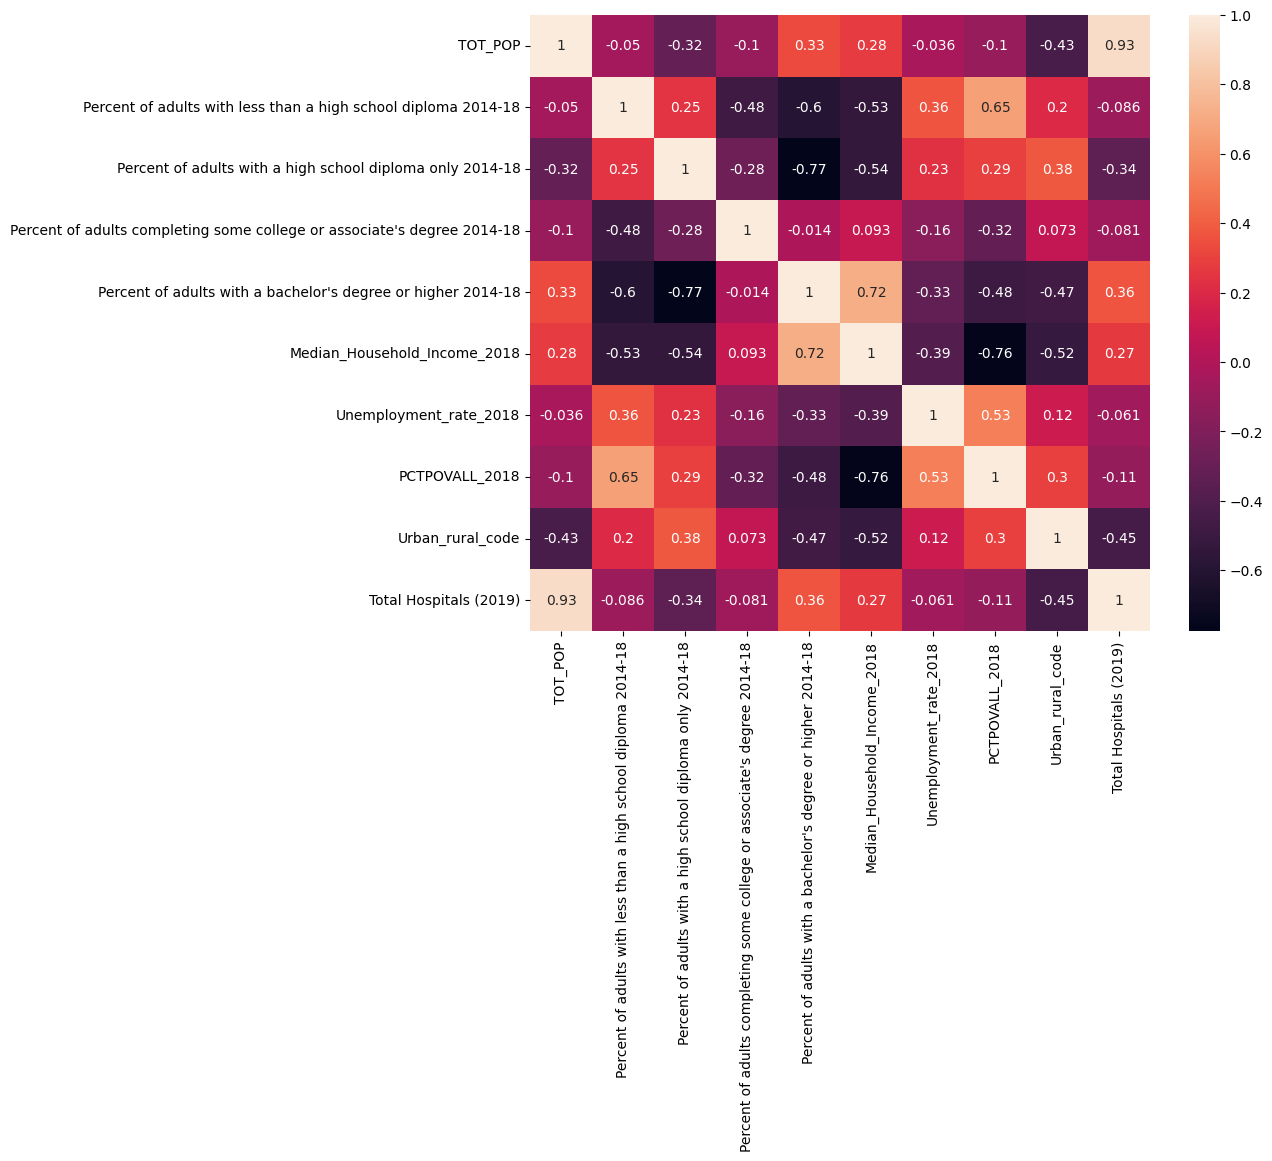

In [17]:
# Correlation matrix
corr = df[features + [target]].corr()
# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()


In [18]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [20]:
# One-hot encode categorical
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[['Urban_rural_code']])
X_test_encoded = encoder.transform(X_test[['Urban_rural_code']])


In [21]:
# Get encoded feature names
encoded_cols = encoder.get_feature_names_out(['Urban_rural_code'])


In [22]:
# Create DataFrames for encoded features
X_train_enc_df = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
X_test_enc_df = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)


In [23]:
# Drop original categorical
X_train.drop(columns=['Urban_rural_code'], inplace=True)
X_test.drop(columns=['Urban_rural_code'], inplace=True)


In [24]:
# Concatenate encoded features
X_train = pd.concat([X_train, X_train_enc_df], axis=1)
X_test = pd.concat([X_test, X_test_enc_df], axis=1)


In [25]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
# Initialize linear regression
lr = LinearRegression()


In [27]:
# Train linear regression
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [28]:
# Predict with linear regression
y_pred_lr = lr.predict(X_test_scaled)


In [29]:
# Calculate R2
r2_lr = r2_score(y_test, y_pred_lr)
print('Linear Regression R2:', r2_lr)


Linear Regression R2: 0.8393029002888188


In [34]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Linear Regression MAE:', mae_lr)

Linear Regression MAE: 0.6036409987040716


In [35]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
print('Linear Regression MSE:', mse_lr)

Linear Regression MSE: 1.592181985242916


In [36]:
rmse_lr = np.sqrt(mse_lr)
print('Linear Regression RMSE:', rmse_lr)

Linear Regression RMSE: 1.261816938086867


In [30]:
# Initialize alphas and R2 list
alphas = np.linspace(0.01, 20, 100)
r2_lasso = []


In [31]:
# Loop over alphas
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred_lasso)
    r2_lasso.append(r2)


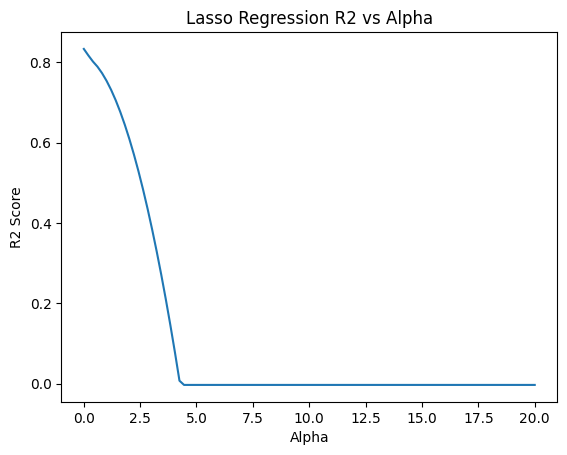

In [32]:
# Plot R2 vs Alpha
plt.plot(alphas, r2_lasso)
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('Lasso Regression R2 vs Alpha')
plt.show()


In [37]:
optimal_alpha = alphas[np.argmax(r2_lasso)]
print('Optimal Alpha:', optimal_alpha)


Optimal Alpha: 0.01


In [38]:
lasso_optimal = Lasso(alpha=optimal_alpha, max_iter=10000)
lasso_optimal.fit(X_train_scaled, y_train)
y_pred_lasso_optimal = lasso_optimal.predict(X_test_scaled)
r2_lasso_optimal = r2_score(y_test, y_pred_lasso_optimal)
print('Optimal Lasso R²:', r2_lasso_optimal)


Optimal Lasso R²: 0.8330317938218391


In [40]:
#comparing linear and lasso regression coefficients
coef_lr = pd.Series(lr.coef_, index=X_train.columns)

coef_lasso = pd.Series(lasso_optimal.coef_, index=X_train.columns)

coef_df = pd.DataFrame({'Linear Regression': coef_lr, 'Lasso Regression': coef_lasso})
print(coef_df)



                                                    Linear Regression  \
TOT_POP                                                      4.018465   
Percent of adults with less than a high school ...           0.705123   
Percent of adults with a high school diploma on...           0.783353   
Percent of adults completing some college or as...           0.661231   
Percent of adults with a bachelor's degree or h...           1.411863   
Median_Household_Income_2018                                -0.338012   
Unemployment_rate_2018                                      -0.074898   
PCTPOVALL_2018                                              -0.044677   
Urban_rural_code_2                                          -0.500546   
Urban_rural_code_3                                          -0.438759   
Urban_rural_code_4                                          -0.543968   
Urban_rural_code_5                                          -0.815737   
Urban_rural_code_6                                 

The analysis confirms a relationship between health resources and sociodemographic data.

Total Population is the strongest predictor of the number of hospitals.

Lasso Regression helps in identifying and removing less significant variables, leading to a simpler and more interpretable model.

The results can inform policymakers and healthcare planners in resource distribution.